lan1
gan0
gan1
gan2


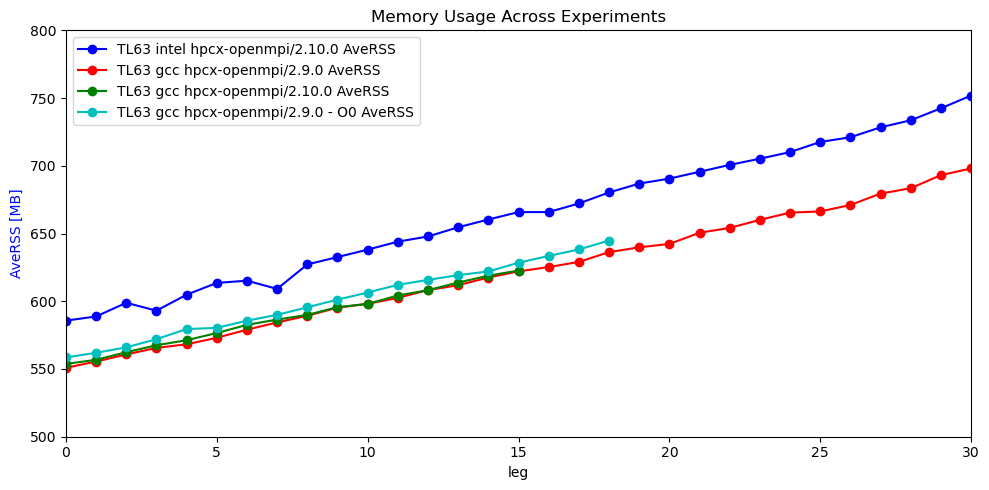

In [1]:
import matplotlib.pyplot as plt

# List of experiments
expnames = ["lan1", "gan0", "gan1", "gan2"]
description = {
    "lan1": "TL63 intel hpcx-openmpi/2.10.0",
    "gan0": "TL63 gcc hpcx-openmpi/2.9.0",
    "gan1": "TL63 gcc hpcx-openmpi/2.10.0",
    "gan2": "TL63 gcc hpcx-openmpi/2.9.0 - O0",
    "gan3": "TL63 gcc openmpi//4.1.5.4",
}

JOBDIR = '/lus/h2resw01/hpcperm/ccpd/ecearth4/jobs'

# Colors for plotting (distinct colors for different experiments)
colors = ['b', 'r', 'g', 'c', 'm', 'y']

# Create the figure and axes
fig, ax1 = plt.subplots(figsize=(10, 5))

# Create a secondary y-axis
#ax2 = ax1.twinx()
plt.xlim(0, 30)
plt.ylim(500,800)    

# Loop over each experiment
for i, expname in enumerate(expnames):
    print(expname)
    filename = f'{JOBDIR}/rss_usage_results_{expname}.txt'

    # Lists to hold the data
    indices = []
    max_rss_mb = []
    ave_rss_mb = []

    # Load data from file
    with open(filename, 'r') as file:
        for index, line in enumerate(file):
            parts = line.split()
            indices.append(index)
            max_rss_mb.append(float(parts[1]))  # MaxRSS
            ave_rss_mb.append(float(parts[2]))  # AveRSS

    # Plot MaxRSS for the current experiment
    ax1.plot(indices, ave_rss_mb, color=colors[i % len(colors)], linestyle='-', marker='o', label=f'{description[expname]} AveRSS')

    # Plot AveRSS for the current experiment on the shared secondary y-axis
    #ax2.plot(indices, ave_rss_mb, color=colors[i % len(colors)], linestyle='--', marker='x', label=f'{description[expname]} AveRSS')

# Set labels and titles
ax1.set_xlabel('leg')
ax1.set_ylabel('AveRSS [MB]', color='b')
#ax2.set_ylabel('AveRSS [MB]', color='r')
plt.title('Memory Usage Across Experiments')

# Combine legends from both axes
lines_1, labels_1 = ax1.get_legend_handles_labels()
#lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1, labels_1, loc='upper left')

# Adjust layout
fig.tight_layout()

# Save the figure
plt.savefig('fig_multiple_exp.png', format='png')

# Show the figure
plt.show()


In [11]:
max_rss_mb

[598.62,
 600.69,
 604.21,
 611.86,
 620.93,
 620.16,
 625.25,
 630.09,
 635.08,
 639.7,
 646.0,
 653.15,
 656.36,
 659.76,
 661.28,
 669.05,
 674.87,
 678.94,
 685.5]

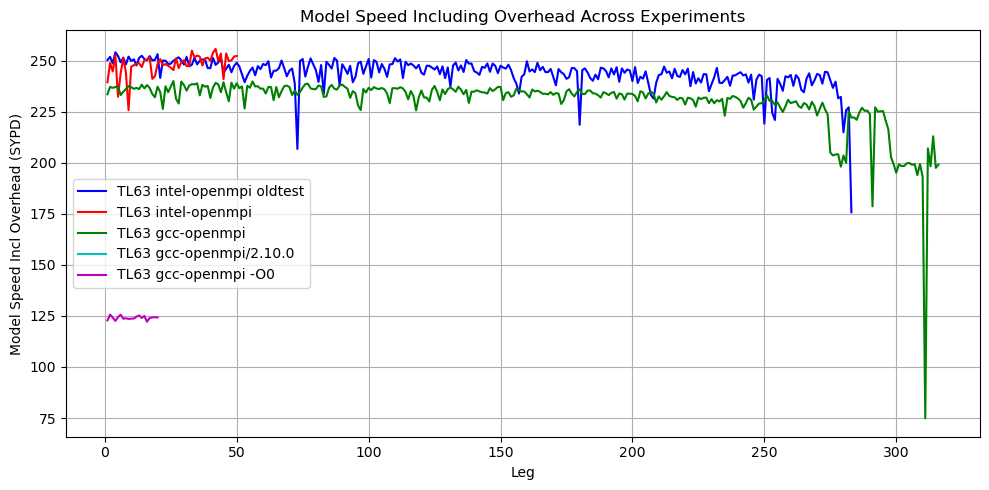

In [3]:
import os
import re
import matplotlib.pyplot as plt


# List of experiments
expnames = ["lan0", "lan1", "gan0", "gan2"]
description = {
    "lan0": "TL63 intel-openmpi oldtest", 
    "lan1": "TL63 intel-openmpi",
    "gan0": "TL63 gcc-openmpi",
    "gan1": "TL63 gcc-openmpi/2.10.0",
    "gan2": "TL63 gcc-openmpi -O0"
}

# List of folder names (assuming they are the same for all experiments)

# Regex pattern to extract model speed including overhead
pattern = re.compile(r"Model speed incl overhead:\s+([\d.]+) SYPD")

# Initialize a dictionary to store speeds for each experiment
experiment_speeds = {exp: [] for exp in description.keys()}

# Loop over each experiment and extract model speeds
for expname in expnames:
    base_dir = f"/lus/h2resw01/scratch/ccpd/ece4/{expname}/log"
    folders = sorted(os.listdir(base_dir))
    for folder in folders:
        filepath = os.path.join(base_dir, folder, 'timing.log')
        try:
            with open(filepath, 'r') as file:
                for line in file:
                    match = pattern.search(line)
                    if match:
                        model_speed = float(match.group(1))
                        experiment_speeds[expname].append((int(folder), model_speed))
                        break  # Stop reading after finding the first match
        except FileNotFoundError:
            print(f"File not found: {filepath}")

# Plotting
plt.figure(figsize=(10, 5))
colors = ['b', 'r', 'g', 'c', 'm', 'y']  # Different colors for each experiment

# Plot each experiment's data
for i, (expname, speeds) in enumerate(experiment_speeds.items()):
    folders, speed_values = zip(*speeds) if speeds else ([], [])
    plt.plot(folders, speed_values, linestyle='-', color=colors[i % len(colors)], label=f'{description[expname]}')

plt.xlabel('Leg')
plt.ylabel('Model Speed Incl Overhead (SYPD)')
plt.title('Model Speed Including Overhead Across Experiments')
plt.grid(True)
plt.legend()
plt.tight_layout()

# Save the plot
#plt.savefig('model_speed_plot_multiple_experiments.png', format='png')

# Show the plot
plt.show()

